<a href="https://colab.research.google.com/github/ChoiJMS2/Colab_Study/blob/main/4%EC%9B%94%20%EA%B3%B5%EB%B6%80/20230417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplotlib + seaborn

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [169]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
def major_formatter(x, pos):
  return "%.2f$" % x

formatter = FuncFormatter(major_formatter)
formatter

Sun 21.41


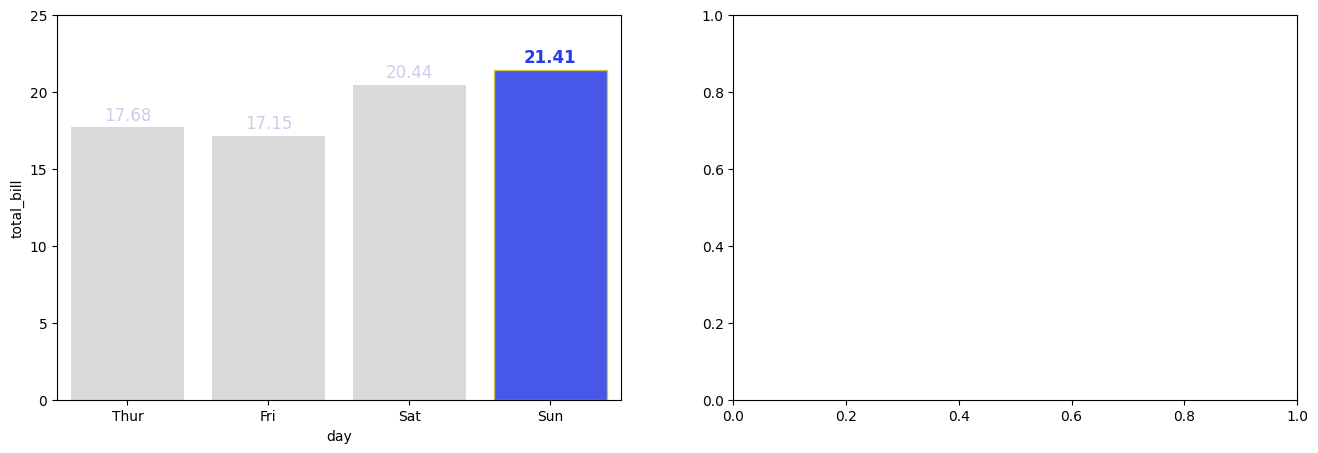

In [170]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
ax0 = sns.barplot(x = 'day'      
            , y = 'total_bill' 
            , data = tips      
            , errorbar = None
            , color = 'lightgray'
            , alpha = 0.85
            , ax = ax[0]
            )
ax0.set_ylim(0, 25)

h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0], 2)
print(h_day, h_mean)

for p in ax0.patches:
  fontweight = 'normal'
  color = '#CDCCED'
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight = 'bold'
    color = '#273AE5'
    p.set_facecolor(color)
    p.set_edgecolor("#DBCC2A")

  ax0.text(p.get_x() + p.get_width()/2., 
           height+0.5, 
           height, 
           ha = 'center', 
           size=12, 
           fontweight=fontweight, 
           color=color)
  
plt.show()

In [171]:
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
# print(group_mean)

h_day = group_mean.sort_values(ascending = False).index[0]
h_mean = np.round(group_mean.sort_values(ascending = False).values[0], 2)

Sun 21.41


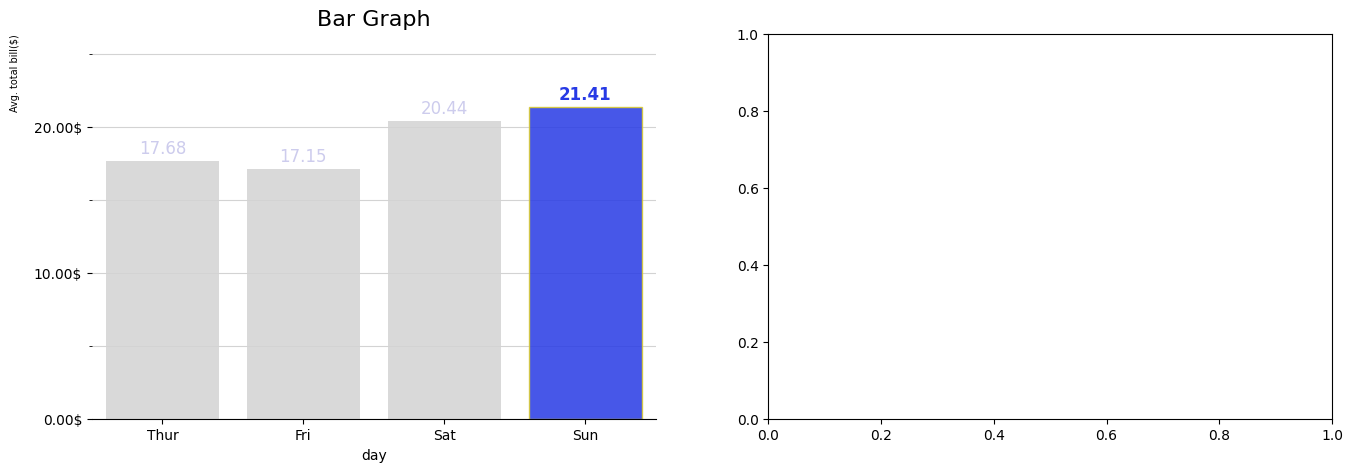

In [172]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
ax0 = sns.barplot(x = 'day'      
            , y = 'total_bill' 
            , data = tips      
            , errorbar = None
            , color = 'lightgray'
            , alpha = 0.85
            , ax = ax[0]
            , zorder = 2
            )


h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0], 2)
print(h_day, h_mean)

for p in ax0.patches:
  fontweight = 'normal'
  color = '#CDCCED'
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight = 'bold'
    color = '#273AE5'
    p.set_facecolor(color)
    p.set_edgecolor("#DBCC2A")

  ax0.text(p.get_x() + p.get_width()/2., 
           height+0.5, 
           height, 
           ha = 'center', 
           size=12, 
           fontweight=fontweight, 
           color=color)
  
ax0.set_ylim(0, h_mean + 5)
ax0.set_title("Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
#ax0.spines['left'].set_position("outward", 20)
ax0.spines['left'].set_visible(False)

# y축 tick 설정
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel('Avg. total bill($)', fontsize = 7, labelpad=10.0, loc = "top")
ax0.grid(axis="y", which="major", color = "lightgray")
ax0.grid(axis="y", which="minor", color = "lightgray")
plt.show()

<ipython-input-173-0f4f176e8008>:17: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


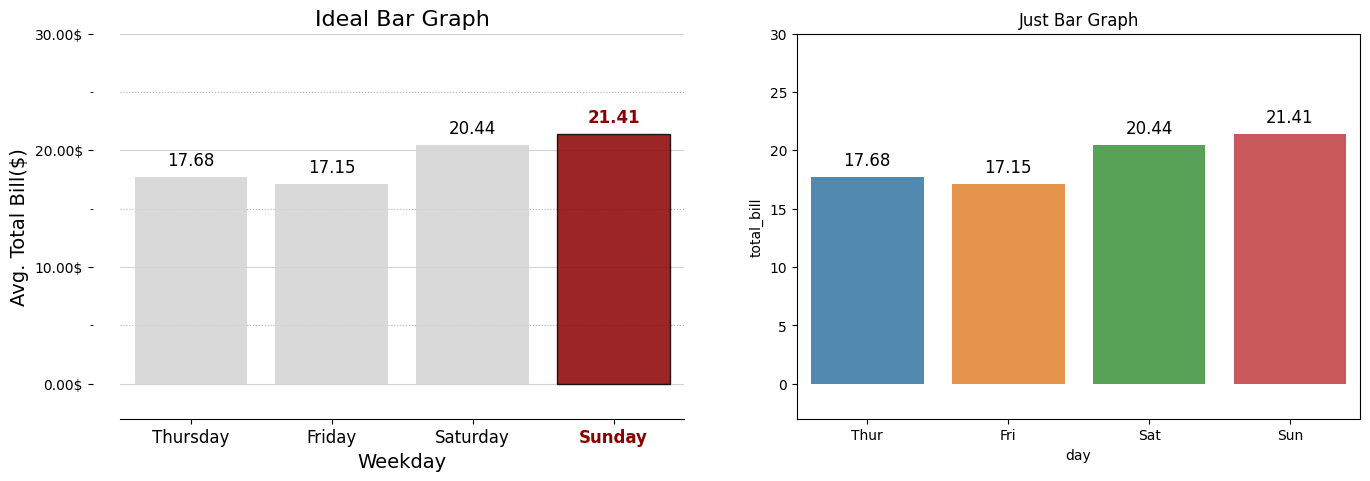

In [173]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

# 데이터 불러오기
tips = sns.load_dataset("tips")

# 시각화 객체지향선언
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', 
           size=12, 
           fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  errorbar=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

#plotly

In [174]:
import pandas as pd

df = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})
df

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [175]:
import plotly
print(plotly.__version__)

5.13.1


# plotly.graph_objects 와 express 의 차이점
https://plotly.com/python/graph-objects/

In [176]:
import plotly.graph_objects as go
fig = go.Figure()

# 막대그래프
for contestant, group in df.groupby('Contestant'):
  fig.add_trace(go.Bar(x=group['Fruit'], y=group['Number Eaten']
                       , name = contestant
                       , hovertemplate="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% contestant))
  
# 옵션
fig.update_layout(title = 'graph_object Plot', legend_title_text = 'Contestant')
fig.update_xaxes(title_text = 'Fruit')
fig.update_yaxes(title_text = 'Number Eaten')

fig.show()

In [177]:
# express

import plotly.express as px
fig = px.bar(df, x = 'Fruit', y = 'Number Eaten',
             color = 'Contestant', barmode = 'group')
fig.update_layout(title = 'Express Chart')
fig.show()

## 데이터 불러오기
- raw_sales.csv 파일 불러오기


In [178]:
from google.colab import drive
drive.mount("/content/drive")
DATA_PATH='/content/drive/MyDrive/2023_Yonsei_IT/data/'
sales = pd.read_csv(DATA_PATH + 'raw_sales.csv', parse_dates=['datesold'])
sales.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
5,2007-04-04,2905,465000,house,4
6,2007-04-24,2607,399000,house,3
7,2007-04-30,2606,1530000,house,4
8,2007-05-24,2902,359000,house,3
9,2007-05-25,2906,320000,house,3


In [179]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [180]:
# 컬럼명 : year / year 추출
# groupby 연산, 기준컬럼 year, 대상컬럼 : price, 평균
import pandas as pd

sales['year'] = sales['datesold'].dt.year
result = round(sales.groupby('year')['price'].agg('mean'), 2)
result = pd.DataFrame(result).reset_index()
result

,year,price
0,2007,522377.21
1,2008,493814.16
2,2009,496092.03
3,2010,559564.81
4,2011,566715.11
5,2012,552501.37
6,2013,553416.30
7,2014,592653.76
8,2015,626101.34
9,2016,635185.31


In [181]:
import plotly.express as px
fig = px.line(result, x = 'year', y = 'price')
fig.show()

In [182]:
from google.colab import drive
drive.mount("/content/drive")
DATA_PATH='/content/drive/MyDrive/2023_Yonsei_IT/data/'
sales = pd.read_csv(DATA_PATH + 'raw_sales.csv', parse_dates=['datesold'])
sales.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [183]:
import pandas as pd

sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
 5   year          29580 non-null  int64         
 6   month         29580 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.6+ MB


In [184]:
sales.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3


In [185]:
# 2008, 2018년 데이터만 추출

#result = sales.loc[(sales['year'] == 2008) |
#                   (sales['year'] == 2018)]

result = sales[sales['year'].isin([2008, 2018])]
result.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
130,2008-01-02,2906,309000,house,2,2008,1
131,2008-01-14,2602,413000,house,3,2008,1
132,2008-01-15,2905,445000,house,4,2008,1
133,2008-01-15,2902,600000,house,4,2008,1
134,2008-01-17,2605,417500,house,2,2008,1


In [186]:
import numpy as np

result = np.round(result.groupby(['year', 'month'])['price'].agg(np.mean).reset_index(), 2)
result

,year,month,price
0,2008,1,504428.57
1,2008,2,531080.00
2,2008,3,563500.00
3,2008,4,534204.55
4,2008,5,522394.74
5,2008,6,539092.65
6,2008,7,537453.12
7,2008,8,449510.42
8,2008,9,496778.65
9,2008,10,454822.04


In [187]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly_white'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [188]:
import plotly.express as px
# pio.templates.defalut = 'plotly_dark'
fig = px.line(result, x = 'month', y = 'price', color = 'year')
fig.update_layout({'plot_bgcolor' : '#F5CCB5'})   #dictionary
fig.show()

## 막대 그래프

In [190]:
# fig.ax = plt.subplot(nrows=2, ncols =1)

import plotly.graph_objects as go 
from plotly.subplots import make_subplots 
import plotly.io as pio
pio.templates.default = 'plotly_white'

fig = make_subplots(rows=2, 
                    cols = 1, 
                    subplot_titles=("1 Chart", "2 Chart"))

for i, year in enumerate([2008, 2018]):
  data = result[result['year'] == year]
  fig.add_trace(go.Bar(x = data['month']
                       , y = data['price']
                       , name=str(year))
                , row=i+1
                , col=1)
fig.show()

In [194]:
# px.box()
# x축 : 2007, 2008, 2009, 2010년
# y축 : price
# propertyType : house. unit
sales.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7
29579,2019-07-26,2612,775000,unit,2,2019,7


In [ ]:
fig = make_subplots(rows=2, 
                    cols = 2, 
                    subplot_titles=("2007", "2008", "2009", "2010"))

for i, year in enumerate([2007, 2008, 2009, 2010]):
  data = result[result['year'] == year]
  fig.add_trace(go.box(x = data['year']
                       , y = data['price']
                       , name=str(year))
                , row=i+1
                , col=1)

In [213]:
import plotly.io as pio
pio.templates.default = 'plotly_white'

test = sales[sales['year'].isin([2007, 2008, 2009, 2010])]
test1 = test[test['price'] <= 2000000]
fig = px.box(test1, x = 'year', y = 'price', color = 'propertyType')


fig.show()